In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# default_exp voxelmap

In [ ]:
# export 
from combinatorial.gmaps import nGmap
from combinatorial.pixelmap import PixelMap

import numpy as np

## Understanding sew orbits

when i-sewing darts d1,d2 in an n-Gmap, the orbits under isomorphism are defined as $<0 \ldots i-2, i+2 \ldots n>$.

This sequence may be empty for 4 cases (see bellow). For these cases the isomorphism check is not necessary, as both orbits consist of a single dart. It is sufficient to check if both d1 and d2 are i-free.

In [ ]:
import itertools

In [ ]:
print ('n | ', end = '')
for i in range (9):
    print (f'i={i}        ', end = '') 
print ()
print (116*'-')
for n in range (9):
    print (n, end =' | ')
    for i in range (n+1):
        s = '<'
        for num in (itertools.chain(range(0, i - 1), range(i + 2, n + 1))):
            s+=f'{num}'
        s += '>'
        print (f'{s:10}', end = ' ')
    print ()    

n | i=0        i=1        i=2        i=3        i=4        i=5        i=6        i=7        i=8        
--------------------------------------------------------------------------------------------------------------------
0 | <>         
1 | <>         <>         
2 | <2>        <>         <0>        
3 | <23>       <3>        <0>        <01>       
4 | <234>      <34>       <04>       <01>       <012>      
5 | <2345>     <345>      <045>      <015>      <012>      <0123>     
6 | <23456>    <3456>     <0456>     <0156>     <0126>     <0123>     <01234>    
7 | <234567>   <34567>    <04567>    <01567>    <01267>    <01237>    <01234>    <012345>   
8 | <2345678>  <345678>   <045678>   <015678>   <012678>   <012378>   <012348>   <012345>   <0123456>  


In [ ]:
g = nGmap.from_string ("""\
1 0 3 2
0 1 2 3
0 1 2 3""")
g

2-gMap of 4 darts:
  # 0-cells: 4
  # 1-cells: 2
  # 2-cells: 2
  # ccs    : 2

In [ ]:
g.sew_no_assert (1,2, 1)

In [ ]:
g

2-gMap of 4 darts:
  # 0-cells: 3
  # 1-cells: 2
  # 2-cells: 1
  # ccs    : 1

In [ ]:
g = nGmap.from_string ("""\
1 0 3 2
0 1 2 3
2 3 0 1""")
g

2-gMap of 4 darts:
  # 0-cells: 2
  # 1-cells: 1
  # 2-cells: 2
  # ccs    : 1

In [ ]:
g.sew_no_assert (1,3, 1)
g

2-gMap of 4 darts:
  # 0-cells: 2
  # 1-cells: 1
  # 2-cells: 1
  # ccs    : 1

In [ ]:
g.print_alpha_table()

 D# |   0  1  2  3 
-------------------
 α0 |   1  0  3  2 
 α1 |   0  3  2  1 
 α2 |   2  3  0  1 


# create cube by 2-sewing edges of bounded square

In [ ]:
g = PixelMap.from_shape(1,6,sew=False)

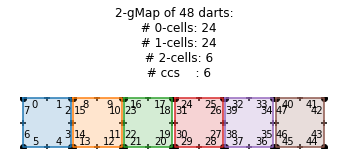

In [ ]:
g.plot_faces()

In [ ]:
# make a 3-gMap out of 2-gMap, adding the identity involution
array_4x48 = np.vstack ((np.array (g),np.arange(48)))
g = nGmap.from_alpha_array (array_4x48)
g

3-gMap of 48 darts:
  # 0-cells: 24
  # 1-cells: 24
  # 2-cells: 6
  # 3-cells: 6
  # ccs    : 6

In [ ]:
def i_sew (g,i,d1,d2):
    """
    i-sew making knowing that d1,d2 are i-sewable
    """
    if i == 2:
        sew_seq = [0]
    if i == 3:
        sew_seq = [0,1]
    for _d1,_d2 in zip (g.orbit(sew_seq,d1), g.orbit(sew_seq,d2)):
        g._link (i,_d1,_d2)


In [ ]:
# darts to 2-sew, see image

sew_indices = np.fromstring ('0 43 2 39 4 19 6 11 24 47 26 15 28 23 30 35 8 45 12 17 32 41 36 21', sep=" ", dtype = np.uint8).reshape (12,2)
sew_indices.T;

In [ ]:
for d1,d2 in sew_indices:
    i_sew(g,2,d1,d2)

In [ ]:
assert g.is_valid

# Replicate the cubes

In [ ]:
# number of slices, rows, and coluns
S,R,C = 2,1,1

In [ ]:
big_array = np.tile (np.array(g),S*R*C).reshape (4,S*R*C,48)

In [ ]:
for i_cube in range (S*R*C):
    big_array[:,i_cube] += 48*i_cube
big_array = big_array.reshape (4,-1)

In [ ]:
big_array.shape

(4, 96)

In [ ]:
voxel_map = nGmap.from_alpha_array (big_array)

In [ ]:
voxel_map.is_valid

True

In [ ]:
voxel_map

3-gMap of 96 darts:
  # 0-cells: 16
  # 1-cells: 24
  # 2-cells: 12
  # 3-cells: 2
  # ccs    : 2

# 3-sew the cubes

- columns sews : 0, 25+48
- row sews : 8, 33+48
- slice sews: 21, 40+48

In [ ]:
darts_to_sew = [[21,40], [8,33], [0,25]]

# column-wise sew
dart_to_sew_1st, dart_to_sew_2nd = darts_to_sew[2]
for s in range (S):            # for all Slices 
    for r in range (R):        # for all Rows
        for c in range (C-1):  # for all Columns but last one
            i_sew (voxel_map, 3, 48*(s*R*C+r*C+c) + dart_to_sew_1st, 48*(s*R*C+r*C+c+1) + dart_to_sew_2nd)

# row-wise sew
dart_to_sew_1st, dart_to_sew_2nd = darts_to_sew[1]
for s in range (S):            # for all Slices 
    for r in range (R-1):      # for all Rows but last one
        for c in range (C):    # for all Columns
            i_sew (voxel_map, 3, 48*(s*R*C+r*C+c) + dart_to_sew_1st, 48*(s*R*C+(r+1)*C+c) + dart_to_sew_2nd)

# slice-wise sew
dart_to_sew_1st, dart_to_sew_2nd = darts_to_sew[0]
for s in range (S-1):          # for all Slices but last one 
    for r in range (R):        # for all Rows
        for c in range (C):    # for all Columns
            i_sew (voxel_map, 3, 48*(s*R*C+r*C+c) + dart_to_sew_1st, 48*((s+1)*R*C+r*C+c) + dart_to_sew_2nd)

In [ ]:
voxel_map.is_valid

True

In [ ]:
voxel_map

3-gMap of 96 darts:
  # 0-cells: 12
  # 1-cells: 20
  # 2-cells: 11
  # 3-cells: 2
  # ccs    : 1

# Remove the first two faces

In [ ]:
voxel_map.remove_2_cell (0)

In [ ]:
voxel_map

3-gMap of 88 darts:
  # 0-cells: 12
  # 1-cells: 20
  # 2-cells: 10
  # 3-cells: 2
  # ccs    : 1

In [ ]:
voxel_map.remove_2_cell (48)

In [ ]:
voxel_map

3-gMap of 80 darts:
  # 0-cells: 12
  # 1-cells: 20
  # 2-cells: 9
  # 3-cells: 2
  # ccs    : 1

In [ ]:
list (voxel_map.sew_seq (3))

[0, 1]

# VoxelMap: Putting the things together in class

In [ ]:
# export

# darts of 12 edges to be sewn when constructing cube from squares
#      0  2  4  6 24 26 28 30  8 12 32 36
#     43 39 19 11 47 15 23 35 45 17 41 21

DARTS_TO_2_SEW = np.fromstring ("""
     0  2  4  6    24 26 28 30   10 18 39 47
     9 40 32 17    12 45 37 20   23 34 42 15
""", sep=' ', dtype=np.uint8).reshape ((2,12)).T


# darts to be 3-sewn, when linking voxels, along axis 0, 1, and 2
# DARTS_TO_3_SEW = [[21, 40], [8, 33], [0, 25]]
DARTS_TO_3_SEW = [[24,0], [32,8], [40,16]]


def make_cube():
    six_squares = PixelMap.from_shape(1, 6, sew=False)
    # make a 3-gMap out of 2-gMap, adding the identity involution
    array_4x48 = np.vstack((np.array(six_squares), np.arange(48)))

    cube = nGmap.from_alpha_array(array_4x48)

    for d1, d2 in DARTS_TO_2_SEW:  # iterate over 2-tuples of darts to 2-sew, see image
        cube.sew_no_assert(d1, d2, 2)
    return cube


class VoxelMap (nGmap):
    @property
    def n_slices (self):
        return self._nS

    @property
    def n_columns (self):
        return self._nC

    @property
    def n_rows (self):
        return self._nR

    @classmethod
    def from_shape (cls, n_slices, n_rows, n_columns, sew=True, bounded=True):
        """Constructs grid-like gmap from number slices, rows and columns

        Args:
            n_slices: number of slices
            n_rows: number of rows
            n_columns: number of columns
            sew: sew the pixels together (default) or not?
            bounded: set to False to add the outer boundary

        Returns:
            3-gMap representing a voxel array
        """

        cube = make_cube()

        # step 1: replicate the cube n_slices*n_rows*n_columns times with dart increments of 48
        big_array = np.tile(np.array(cube), n_slices * n_rows * n_columns)
        big_array = big_array.reshape((4, n_slices * n_rows * n_columns, 48))
        for i_cube in range(n_slices * n_rows * n_columns):
            big_array[:, i_cube] += 48 * i_cube
        big_array = big_array.reshape((4, -1))

        # make a gmap consisting of n_slices * n_rows * n_columns cubes
        vox_map = cls.from_alpha_array(big_array)
        vox_map._nS, vox_map._nR, vox_map._nC = n_slices, n_rows, n_columns

        if sew:  # 3-sew the cubes
            # column-wise 3-sews
            dart_to_sew_1st, dart_to_sew_2nd = DARTS_TO_3_SEW[2]
            for s in range(n_slices):  # for all Slices
                for r in range(n_rows):  # for all Rows
                    for c in range(n_columns - 1):  # for all Columns but last one
                        vox_map.sew_no_assert(
                            48 * (s * n_rows * n_columns + r * n_columns + c) + dart_to_sew_1st,
                            48 * (s * n_rows * n_columns + r * n_columns + c + 1) + dart_to_sew_2nd,
                            3)

            # row-wise 3-sews
            dart_to_sew_1st, dart_to_sew_2nd = DARTS_TO_3_SEW[1]
            for s in range(n_slices):  # for all Slices
                for r in range(n_rows - 1):  # for all Rows but last one
                    for c in range(n_columns):  # for all Columns
                        vox_map.sew_no_assert(
                            48 * (s * n_rows * n_columns + r * n_columns + c) + dart_to_sew_1st,
                            48 * (s * n_rows * n_columns + (1 + r) * n_columns + c) + dart_to_sew_2nd,
                            3)

            # slice-wise 3-sews
            dart_to_sew_1st, dart_to_sew_2nd = DARTS_TO_3_SEW[0]
            for s in range(n_slices - 1):  # for all Slices but last one
                for r in range(n_rows):  # for all Rows
                    for c in range(n_columns):  # for all Columns
                        vox_map.sew_no_assert(
                            48 * (s * n_rows * n_columns + r * n_columns + c) + dart_to_sew_1st,
                            48 * ((1 + s) * n_rows * n_columns + r * n_columns + c) + dart_to_sew_2nd,
                            3)

        if not bounded:  # TODO implement the shell darts for an unbounded map
            raise NotImplemented

        assert vox_map.is_valid

        return vox_map

In [ ]:
# test that a randomly SxRxC unbounded gmap has a proper number of vertices, edges, faces, and volumes

S,R,C=np.random.randint (1,10,3)
# S,R,C=1,1,1

print (f"Tests for {S}x{R}x{C} sewn and unsewn voxel maps.")

g_sewn   = VoxelMap.from_shape (S,R,C, sew=True)
g_free   = VoxelMap.from_shape (S,R,C, sew=False)

assert   g_sewn.is_valid
assert   g_free.is_valid


# test for sewn voxels
# print (type (g_sewn))
assert g_sewn.n_slices   == S
assert g_sewn.n_rows     == R
assert g_sewn.n_columns  == C
assert g_sewn.n_darts    == S*R*C*48 
assert g_sewn.no_0_cells == (S+1)*(R+1)*(C+1)
assert g_sewn.no_1_cells == S*(R+1)*(C+1) + R*(S+1)*(C+1) + C*(S+1)*(R+1)
assert g_sewn.no_2_cells == (S+1)*R*C + (R+1)*S*C + (C+1)*S*R 
assert g_sewn.no_3_cells == S*R*C
assert g_sewn.no_ccs     == 1

# test for unsewn voxels
assert g_free.n_slices   == S
assert g_free.n_rows     == R
assert g_free.n_columns  == C
assert g_free.n_darts    == S*R*C * 48 
assert g_free.no_0_cells == S*R*C *  8
assert g_free.no_1_cells == S*R*C * 12 
assert g_free.no_2_cells == S*R*C *  6
assert g_free.no_3_cells == S*R*C
assert g_free.no_ccs     == S*R*C

print ('Tests Passed')

Tests for 9x5x9 sewn and unsewn voxel maps.
Tests Passed


## Experiments

In [ ]:
g_tunnel = VoxelMap.from_shape(1,1,1)

In [ ]:
class VoxMap (VoxelMap):
    def i2d (self,s,r,c,far,ax,no):
        """Index to dart
        
        """
        return 48*(s * self.n_rows * self.n_columns + r * self.n_columns + c) + 8 *(ax+3*far) + no
    
    def d2i (self, d):
        """Dart to index"""
    
        src,fan = d // 48, d % 48
        fa,no = fan // 8, fan % 8
        far,ax = fa // 3, fa % 3
        
        s  = src // (self.n_rows * self.n_columns)
        rc = src %  (self.n_rows * self.n_columns)
        r  = rc  //  self.n_columns
        c  = rc  %   self.n_columns

        return s,r,c,far,ax,no

In [ ]:
for d,(s,r,c,far,ax,no) in enumerate (itertools.product(
    range (gg.n_slices),
    range (gg.n_rows),
    range (gg.n_columns),
    range (2),
    range (3),
    range (8))):
    
    assert d == gg.i2d (s,r,c,far,ax,no)
#     print (f'{d:3} {gg.i2d (s,r,c,ax,nf,no):3}   ', s,r,c,ax,nf,no)

#     print (d, gg.d2i (d))
    assert gg.d2i (d) == (s,r,c,far,ax,no), gg.d2i (d)

In [ ]:
gg = VoxMap.from_shape (1,3,3)

# for each 'y','x' remove the 'far' face along 'ax' axis
#   y x  ax
to_remove = np.fromstring ("""\
    0 0  2
    0 1  2 
    0 2  1
    1 2  1 
    2 1  2
    2 0  2
    1 0  1
    0 0  1
""", sep = " ", dtype=int).reshape (-1,3)

to_remove = np.fromstring ("""\
    0 1  1
    1 0  2
    1 1  2
    1 1  1
""", sep = " ", dtype=int).reshape (-1,3)


In [ ]:
for (r,c,ax) in to_remove [:]:
    gg.remove_face (gg.i2d(0,r,c,1,ax,0))
#     print (gg)
for d in gg.darts_of_i_cells (3):
    print (sorted ({gg.d2i(e)[1:3] for e in gg.cell_3(d)}))

[(0, 0)]
[(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)]
[(0, 2)]
[(2, 0)]
[(2, 2)]


In [ ]:
gg

3-gMap of 368 darts:
  # 0-cells: 32
  # 1-cells: 64
  # 2-cells: 38
  # 3-cells: 5
  # ccs    : 1

In [ ]:
for d in sorted (list(gg.cell_i (3,192))):
    e = gg.a3(d)
    if d != e:
        print (gg.d2i(d)[1:], gg.d2i(e)[1:])#, gg.a3(d))

(1, 1, 0, 1, 0) (0, 1, 1, 1, 0)
(1, 1, 0, 1, 1) (0, 1, 1, 1, 1)
(1, 1, 0, 1, 2) (0, 1, 1, 1, 2)
(1, 1, 0, 1, 3) (0, 1, 1, 1, 3)
(1, 1, 0, 1, 4) (0, 1, 1, 1, 4)
(1, 1, 0, 1, 5) (0, 1, 1, 1, 5)
(1, 1, 0, 1, 6) (0, 1, 1, 1, 6)
(1, 1, 0, 1, 7) (0, 1, 1, 1, 7)
(1, 1, 0, 2, 0) (1, 0, 1, 2, 0)
(1, 1, 0, 2, 1) (1, 0, 1, 2, 1)
(1, 1, 0, 2, 2) (1, 0, 1, 2, 2)
(1, 1, 0, 2, 3) (1, 0, 1, 2, 3)
(1, 1, 0, 2, 4) (1, 0, 1, 2, 4)
(1, 1, 0, 2, 5) (1, 0, 1, 2, 5)
(1, 1, 0, 2, 6) (1, 0, 1, 2, 6)
(1, 1, 0, 2, 7) (1, 0, 1, 2, 7)
(1, 1, 1, 1, 0) (2, 1, 0, 1, 0)
(1, 1, 1, 1, 1) (2, 1, 0, 1, 1)
(1, 1, 1, 1, 2) (2, 1, 0, 1, 2)
(1, 1, 1, 1, 3) (2, 1, 0, 1, 3)
(1, 1, 1, 1, 4) (2, 1, 0, 1, 4)
(1, 1, 1, 1, 5) (2, 1, 0, 1, 5)
(1, 1, 1, 1, 6) (2, 1, 0, 1, 6)
(1, 1, 1, 1, 7) (2, 1, 0, 1, 7)
(1, 1, 1, 2, 0) (1, 2, 0, 2, 0)
(1, 1, 1, 2, 1) (1, 2, 0, 2, 1)
(1, 1, 1, 2, 2) (1, 2, 0, 2, 2)
(1, 1, 1, 2, 3) (1, 2, 0, 2, 3)
(1, 1, 1, 2, 4) (1, 2, 0, 2, 4)
(1, 1, 1, 2, 5) (1, 2, 0, 2, 5)
(1, 1, 1, 2, 6) (1, 2, 0, 2, 6)
(1, 1, 1

In [ ]:
hh = VoxMap.from_shape (1,1,2)
hh.remove_face (41)

In [ ]:
hh

3-gMap of 80 darts:
  # 0-cells: 12
  # 1-cells: 20
  # 2-cells: 10
  # 3-cells: 1
  # ccs    : 1

In [ ]:
for e in 2,15,26,38:
    hh.remove_edge (e)


In [ ]:
hh

3-gMap of 64 darts:
  # 0-cells: 12
  # 1-cells: 16
  # 2-cells: 6
  # 3-cells: 1
  # ccs    : 1

In [ ]:
hh.print_alpha_table()

 D# |   0  1  4  5  6  7  8  9 10 11 12 13 16 17 18 19 20 21 22 23 24 25 28 29 30 31 32 33 34 35 36 37 48 49 50 51 52 53 56 57 60 61 62 63 72 73 74 75 76 77 80 81 84 85 86 87 88 89 90 91 92 93 94 95 
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 α0 |   1  0  5  4  7  6  9  8 11 10 13 12 17 16 19 18 21 20 23 22 25 24 29 28 31 30 33 32 35 34 37 36 49 48 51 50 53 52 57 56 61 60 63 62 73 72 75 74 77 76 81 80 85 84 87 86 89 88 91 90 93 92 95 94 
 α1 |   7 48 53  6  5  0 57 10  9 12 11 60 23 18 17 20 19 22 21 16 31 72 77 30 29 24 81 34 33 36 35 84  1 50 49 52 51  4 63  8 13 62 61 56 25 74 73 76 75 28 87 32 37 86 85 80 95 90 89 92 91 94 93 88 
 α2 |   9  8 32 33 17 16  1  0 23 22 24 25  7  6 34 35 30 31 11 10 12 13 37 36 20 21  4  5 18 19 29 28 57 56 88 89 80 81 49 48 72 73 94 95 60 61 93 92 85 84 52 53 77 76 91 90 50 51 87 86 75 74 62 63 
